# Importar Librerias.

In [164]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score, confusion_matrix

# Carga de datos.

In [3]:
path = "/content/drive/MyDrive/Colab Notebooks/ML/DB/WineQT.csv"
df = pd.read_csv(path)

In [4]:
# Primera vista.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# EDA.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [32]:
# Cambiar espacios por _ en nombre de columnas
df.columns = df.columns.str.replace(" ","_").str.strip().str.lower()

In [33]:
# Eliminar columna id.
df.drop(columns=["id"], inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1143 non-null   float64
 1   volatile_acidity      1143 non-null   float64
 2   citric_acid           1143 non-null   float64
 3   residual_sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free_sulfur_dioxide   1143 non-null   float64
 6   total_sulfur_dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   ph                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


No se identifican valores Null o registros con un tipo de dato incorrecto, al ser todas de tipo numerico se haran revisiones de los datos utilizando graficos para identificar valores fuera de rango

In [81]:
# Funcion para crear diferentes tipo de graficos, pero por cada una de las variables entregadas.
def graficar_diferentes_px_multp(df, variables, tipo='box',n_cols = 3):
  """
  Funcion que permitira crear un grafico por cada variable que se entregue

  Parametros de entrada:
  df = DataFrame
  variables = Listado de columnas que se usaran para crear los graficos (y)
  tipo = tipo de grafico que se desea crear
    - box
    - hist
    - line

  Retorno: crea un grafico por cada variable entregada.
  """

  n_rows = -(-len(variables) // n_cols)  # Obtiene numero de filas que se crearan.
  fig = make_subplots(rows=n_rows, cols= n_cols, subplot_titles=variables)  # Crea Subplot para agregar en el cada grafico.

  for i, var in enumerate(variables): # recorre y enumera cada una de las variables.
    row = i // n_cols + 1 # Calcula en que fila ira el grafico.
    col_idx = i % n_cols + 1 # Calcula en que columna ira el grafico.
    if tipo == 'box':
        fig_px = px.box(
            df,
            y=var, # asignacion de y
            points="outliers", # Muestra outlaiers
            color_discrete_sequence=[px.colors.qualitative.Plotly[i % 10]], # Asigna un color
            title=f'Boxplot - {var}' # Titulo del grafico + nombre de variable.

        )
        trace = fig_px.data[0]  # Obtiene la traza del grafico para entregar la a makesubplot
    elif tipo == 'hist':
        fig_px = px.histogram(
            df,
            x=var,
            nbins=50,
            color_discrete_sequence=[px.colors.qualitative.Plotly[i % 10]],
            title=f'Histograma - {var}'
        )
        trace = fig_px.data[0]
    elif tipo == 'line':
        fig_px = px.line(
            df,
            y=var,
            title=f'Gráfico lineal - {var}',
            color_discrete_sequence=[px.colors.qualitative.Plotly[i % 10]]
        )
        trace = fig_px.data[0]
    else:
        print(f"No puedo crear el grafico '{tipo}.")
        continue

    trace.showlegend = False # Quita las leyebdas para que se vea todo mas limpio.
    fig.add_trace(trace, row=row, col=col_idx) # Inserta la traza del grafico en la celda que corresponda.

    fig.update_layout(
        height=400 + n_rows * 250, # Calcula la altura total de la figura.
        title_text=f'Gráficos Tipo "{tipo}"', # Agrega titulo general.
        margin=dict(t=60, l=40, r=40, b=40), # Asigna bordes para no mostrar todo junto.
    )
  fig.show()



In [74]:
cols_numericas = df.select_dtypes(include=["float64", "int"]).columns # Obtiene nombre de columnas numericas.

graficar_diferentes_px_multp(df, cols_numericas, tipo='box') # Usa la funcion para crear graficos.


Se identifica que para varios datos hay informacion fuer de rangos,se realizara una revision para poder identificar de forma mas clara si esos valores estan correctos o es informacion erronea

In [84]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1143.0,8.31,1.75,4.60,7.10,7.90,9.10,15.90
volatile_acidity,1143.0,0.53,0.18,0.12,0.39,0.52,0.64,1.58
citric_acid,1143.0,0.27,0.20,0.00,0.09,0.25,0.42,1.00
residual_sugar,1143.0,2.53,1.36,0.90,1.90,2.20,2.60,15.50
chlorides,1143.0,0.09,0.05,0.01,0.07,0.08,0.09,0.61
free_sulfur_dioxide,1143.0,15.62,10.25,1.00,7.00,13.00,21.00,68.00
total_sulfur_dioxide,1143.0,45.91,32.78,6.00,21.00,37.00,61.00,289.00
density,1143.0,1.00,0.00,0.99,1.00,1.00,1.00,1.00
ph,1143.0,3.31,0.16,2.74,3.20,3.31,3.40,4.01
sulphates,1143.0,0.66,0.17,0.33,0.55,0.62,0.73,2.00


In [114]:
# Muestra outliers hay por variable.
outlier_info = {}
for var in cols_numericas: # Recorre las variables numericas.
    Q1 = df[var].quantile(0.25) # Calcula el primer cuartil
    Q3 = df[var].quantile(0.75) # Calcula el tercer cuartil
    IQR = Q3 - Q1  # Calcula el rango intercuartílico
    # Define los límites inferior y superior
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
   # Filtra los registrs que tiene un valor menor al límite inferior o mayor que el límite superior.
    outliers = df[(df[var] < low) | (df[var] > high)]
    outlier_info[var] = len(outliers) # Guarda el conteo.

outl = pd.Series(outlier_info).sort_values(ascending=False) # Convierte el diccionario a una serie panda para mejor visualizacion.


In [90]:
# Ver valores en residual_sugar.
df["residual_sugar"].value_counts()

,count
residual_sugar,
2.00,107
2.10,103
1.80,92
2.20,88
1.90,80
...,...
2.15,1
15.40,1
3.75,1


In [93]:
# ordena dataframe por residual_sugar desc para ver los outlaiers
df.sort_values(by='residual_sugar', ascending=False).head(50)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
339,10.6,0.280,0.39,15.50,0.069,6.0,23.0,1.00260,3.12,0.66,9.2,5
1022,10.2,0.540,0.37,15.40,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6
1051,9.9,0.500,0.50,13.80,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
1053,9.9,0.500,0.50,13.80,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
231,10.0,0.490,0.20,11.00,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
230,10.0,0.490,0.20,11.00,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
644,9.1,0.280,0.46,9.00,0.114,3.0,9.0,0.99901,3.18,0.60,10.9,6
648,6.8,0.410,0.31,8.80,0.084,26.0,45.0,0.99824,3.38,0.64,10.1,6
460,6.7,0.420,0.27,8.60,0.068,24.0,148.0,0.99480,3.16,0.57,11.3,6
760,7.9,0.300,0.68,8.30,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7


En la informacion visualizada no se detecta que los valores altos sean un error, por lo que se decide mantener los en la muestra.

In [95]:
# Verificacion con target.
fig = px.box(
        df,
        x="quality",
        y="residual_sugar",
        points="suspectedoutliers", # muestra outlaiers inusuales peor no extremos
        color="quality",
        title=f'Distribución de residual_sugar  según quality ',
        color_discrete_sequence=px.colors.qualitative.Set2
    )

fig.update_layout(showlegend=False)
fig.show()

En el grafico podemos ver que en calidad en numeracion media es donde mas se encuentran los valores inusuales, los que nos confirma que son valores que no se deben eliminar de la muestra o alterar sus datos.

In [97]:
# ordena dataframe por chlorides desc para ver los outlaiers
df.sort_values(by='chlorides', ascending=False).head(50)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
182,7.7,0.410,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4,5
103,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4
75,7.8,0.410,0.68,1.7,0.467,18.0,69.0,0.99730,3.08,1.31,9.3,5
490,8.6,0.490,0.51,2.0,0.422,16.0,62.0,0.99790,3.03,1.17,9.0,5
538,7.8,0.480,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.1,6
973,8.7,0.780,0.51,1.7,0.415,12.0,66.0,0.99623,3.00,1.17,9.2,5
975,8.7,0.780,0.51,1.7,0.415,12.0,66.0,0.99623,3.00,1.17,9.2,5
934,9.1,0.760,0.68,1.7,0.414,18.0,64.0,0.99652,2.90,1.33,9.1,6
738,8.5,0.460,0.59,1.4,0.414,16.0,45.0,0.99702,3.03,1.34,9.2,5
890,8.6,0.635,0.68,1.8,0.403,19.0,56.0,0.99632,3.02,1.15,9.3,5


In [103]:
# Verificacion con target.
fig = px.box(
        df,
        x="quality",
        y="chlorides",
        points="suspectedoutliers", # muestra outlaiers inusuales peor no extremos
        color="quality",
        title=f'Distribución de chlorides  según quality ',
        color_discrete_sequence=px.colors.qualitative.Set2
    )

fig.update_layout(showlegend=False)
fig.show()

Se ve que la relacion de los outlaiers esta relacionad a calidades medias de los vinos, por lo que se mantiene los registros sin aplicar correcciones.

Dado la cantidad de varibales con outlaier se hara una consulta de correlacion para identificar los que son mas necesarios  y enfocar la visualizacion.

In [104]:
# Crea correlacion de columnas con quality
correlaciones = df.corr(numeric_only=True)['quality'].sort_values(ascending=False)
print(correlaciones)

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric_acid             0.240821
fixed_acidity           0.121970
residual_sugar          0.022002
ph                     -0.052453
free_sulfur_dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total_sulfur_dioxide   -0.183339
volatile_acidity       -0.407394
Name: quality, dtype: float64


In [113]:
crr = df.corr(numeric_only=True).round(2)
fig = px.imshow(
    crr,
    text_auto=True,               # Muestra los coeficientes dentro de cada celda
    color_continuous_scale='RdBu',  # Escala de color
    title='Mapa de correlación'
)

fig.update_layout(height=700, width=700)
fig.show()


Como se identifica en las revisiones de correlacion las variables que mas relacion tiene con el target son:
* alcohol                 0.484866
* sulphates               0.257710
* citric_acid             0.240821
* fixed_acidity           0.121970
* residual_sugar          0.022002

In [119]:
# ver cantidad e outlaiers nuevamente para ver si esas tiene muchos valores fuera de rango
outl[["alcohol","sulphates","citric_acid","fixed_acidity","residual_sugar"]]

,0
alcohol,12
sulphates,43
citric_acid,1
fixed_acidity,44
residual_sugar,110


Dada la cantidad de outlier se decide trabajar manteniendo los outlaier ya que no se ven que sean valores incorrectos si no mas bien que son datos no muy comunes.

# Preprocesamiento

# 1. Dividir en X (features) y y (target).

In [120]:
X = df.drop(columns=["quality"]) # Caracteristicas.
y = df["quality"] # Objetivo

# 2. Dividir en train y test.

In [121]:
# Split.
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, # Caracteristicas.
                                                    y, # Objetivo.
                                                    test_size=0.2,  # Porcentaje del dataset para pruebas.
                                                    random_state=42, # Controla la aleatoriedad.
                                                    shuffle= True  # Mezclar los datos antes de dividir.
                                                    )

In [122]:
# Dividir features.
num_cols = X.select_dtypes(include=["float64", "int"]).columns


# Modelo.

# Regresion Lineal

In [123]:
preprocessor_rl = ColumnTransformer([
    ("num", StandardScaler(), num_cols)
])

In [124]:
pipeline_rl = Pipeline([
    ("preprocessing", preprocessor_rl),
    ("regressor", LinearRegression())
])


In [125]:
# Entrenamiento
pipeline_rl.fit(X_train, y_train)
y_pred_rl = pipeline_rl.predict(X_test)

mse_rl = mean_squared_error(y_test, y_pred_rl)
rmse_rl = np.sqrt(mse_rl)
r2_rl = r2_score(y_test, y_pred_rl)


# Random Forest

In [126]:
preprocessor_rf = ColumnTransformer([
    ("num","passthrough", num_cols), # no es necesario escalar numericas
])

In [127]:
pipeline_rf = Pipeline([
    ("preprocessing", preprocessor_rf),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])


In [128]:
# Entrenamiento
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)


# KNN

In [131]:
preprocessor_knn = ColumnTransformer([
   ("num", StandardScaler(), num_cols), # no es necesario escalar numericas
])

In [132]:
pipeline_knn = Pipeline([
    ("preprocessing", preprocessor_knn),
    ("regressor", KNeighborsRegressor(n_neighbors=3))
])


In [134]:
# Entrenamiento
pipeline_knn.fit(X_train, y_train)
y_pred_knn = pipeline_knn.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)


# Comparacion.

In [135]:
# Crear lista con los resultados.
resultados = pd.DataFrame({
    "modelo": ["Regresion Lineal", "Random Forest","KNN"],
    "mse": [mse_rl, mse_rf,mse_knn],
    "rmse":[rmse_rl, rmse_rf, rmse_knn],
    "r2": [r2_rl, r2_rf, r2_knn]
})


In [136]:
resultados

,modelo,mse,rmse,r2
0,Regresion Lineal,0.380032,0.616468,0.317069
1,Random Forest,0.298955,0.546768,0.462767
2,KNN,0.471616,0.686743,0.152491


# Modelo Mejorado.

# Random Forest.

In [137]:
preprocessor_rf_2 = ColumnTransformer([
    ("num","passthrough", num_cols), # no es necesario escalar numericas
])

In [138]:
pipeline_rf_2 = Pipeline([
    ("preprocessing", preprocessor_rf_2),
    ("regressor", RandomForestRegressor(n_estimators=200, max_depth=25, random_state=42))
])


In [139]:
# Optimizacion de hiperparametros.
forest_params = {
    "regressor__n_estimators": [50, 100, 200], # El nombre debe coincidir con el nombre del modelo.
    'regressor__max_depth': [10, 20, None]
}

forest_grid = GridSearchCV(pipeline_rf_2, forest_params, cv=3, scoring="r2")
forest_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol'],
      dtype='object'))])),
                                       ('regressor',
                                        RandomForestRegressor(max_depth=25,
                                                              n_estimators=200,
                                                              random_state=42))]),
             param_grid={'regressor__max_depth': [10, 20, None],
                         'regressor__n_estimators': [50, 100, 200]},
             scoring='r2')

In [150]:
# Evaluación.
arbol_best = forest_grid.best_estimator_
y_pred_arbol = arbol_best.predict(X_test)

print("Arbol Regressor")
print("Mejores parámetros:", forest_grid.best_params_)
print("R²:", r2_score(y_test, y_pred_arbol))

Arbol Regressor
Mejores parámetros: {'regressor__max_depth': None, 'regressor__n_estimators': 200}
R²: 0.4584052301076009


# KNN

In [151]:
knn_params = {
    "regressor__n_neighbors": [2, 3, 5, 10], # El nombre debe coincidir con el nombre del modelo.
}

knn_grid = GridSearchCV(pipeline_knn, knn_params, cv=3, scoring="r2")
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol'],
      dtype='object'))])),
                                       ('regressor',
                                        KNeighborsRegressor(n_neighbors=3))]),
             param_grid={'regressor__n_neighbors': [2, 3, 5, 10]},
             scoring='r2')

In [152]:
knn_best = knn_grid.best_estimator_
y_pred_knn = knn_best.predict(X_test)

print("KNN Regressor")
print("Mejores parámetros:", knn_grid.best_params_)
print("R²:", r2_score(y_test, y_pred_knn))

KNN Regressor
Mejores parámetros: {'regressor__n_neighbors': 10}
R²: 0.364525392365157


# Modelo Mejorado.

# KNN

In [153]:
preprocessor_knn_2 = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
])

In [154]:
pipeline_knn_2 = Pipeline(steps=[
    ("preprocessing", preprocessor_knn_2), # (alias,  transformacion de datos definida antes)
    ("regressor",KNeighborsRegressor(n_neighbors=10)) # (alias, ejecucion del modelo)
])

In [155]:
# Entrenamiento.
pipeline_knn_2.fit(X_train, y_train)
y_pred_knn_2 = pipeline_knn_2.predict(X_test)

mse_knn_2 = mean_squared_error(y_test, y_pred_knn_2)
rmse_knn = np.sqrt(mse_knn_2)
r2_knn_2 = r2_score(y_test, y_pred_knn_2)


# Random Forest.

In [158]:
preprocessor_rf_2 = ColumnTransformer([
    ("num", "passthrough", num_cols),
])

In [159]:
pipeline_rf_2 = Pipeline(steps=[
    ("preprocessing", preprocessor_rf_2), # (alias,  transformacion de datos definida antes)
        ("regressor", RandomForestRegressor(n_estimators=200, max_depth=None, random_state=42)) # (alias, ejecucion del modelo)
])

In [161]:
# Entrenamiento.
pipeline_rf_2.fit(X_train, y_train)
y_pred_rf_2 = pipeline_rf_2.predict(X_test)

mse_rf_2 = mean_squared_error(y_test, y_pred_rf_2)
rmse_rf_2 = np.sqrt(mse_rf_2)
r2_rf_2 = r2_score(y_test, y_pred_rf_2)


# Comparacion resultados.

In [162]:
# Agregar nuevos resultados.
resultados_mejorados = (pd.DataFrame({
    "modelo": ["Ramdom Forest Mejorado", "KNN Mejorado"],
    "mse": [ mse_rf_2, mse_knn_2],
    "rmse":[ rmse_rf_2, rmse_knn_2],
    "r2": [ r2_rf_2, r2_knn_2]
}))

resultados = pd.concat([resultados, resultados_mejorados], ignore_index=True)


In [163]:
resultados

,modelo,mse,rmse,r2
0,Regresion Lineal,0.380032,0.616468,0.317069
1,Random Forest,0.298955,0.546768,0.462767
2,KNN,0.471616,0.686743,0.152491
3,Ramdom Forest Mejorado,0.301383,0.548983,0.458405
4,KNN Mejorado,0.353624,0.686743,0.364525


Luego de aplicar las mejoras no se ven reflejados cambios relevantes  por lo que el modelo inicial es el que tiene mejor resultado.

# Mejor Modelo.

El modelo Random Forest original es el más confiable en este caso. Tiene el mejor balance entre precisión (MSE/RMSE) y explicabilidad (R²)


In [166]:
# Matriz de confusión.
y_pred_classes = y_pred_rf.round().astype(int)
cm = confusion_matrix(y_test, y_pred_classes)

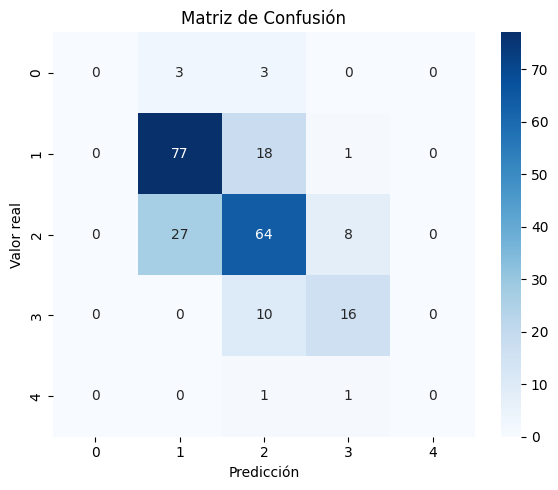

In [167]:
# Visualizamos.
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()


La Clase 1: Tuvo la prediccion mas efectiva.
